In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from KNN import KNN #Imported KNN function from my KNN.py file


ModuleNotFoundError: No module named 'KNN'

In [ ]:
dataset=pd.read_csv("wine.data.csv",delimiter=";") #I red the Wine Dataset
dataset.head() #To see first 5 Data

NameError: name 'pd' is not defined

<Axes: xlabel='Alcohol', ylabel='Color_intensity'>

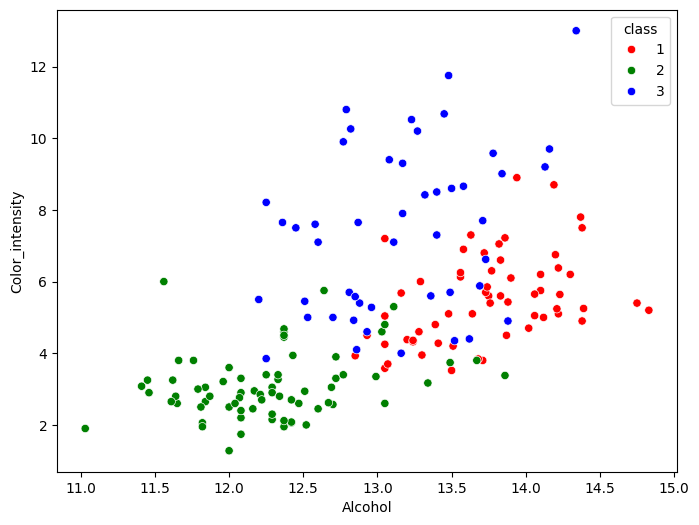

In [ ]:
plt.figure(figsize=(8,6))  #I plotted a graph for two features I choosed
sns.scatterplot(x=dataset['Alcohol'],y=dataset['Color_intensity'],hue=dataset['class'],palette={1: 'red', 2: 'green', 3: 'blue'})

<Axes: xlabel='Magnesium', ylabel='Proline'>

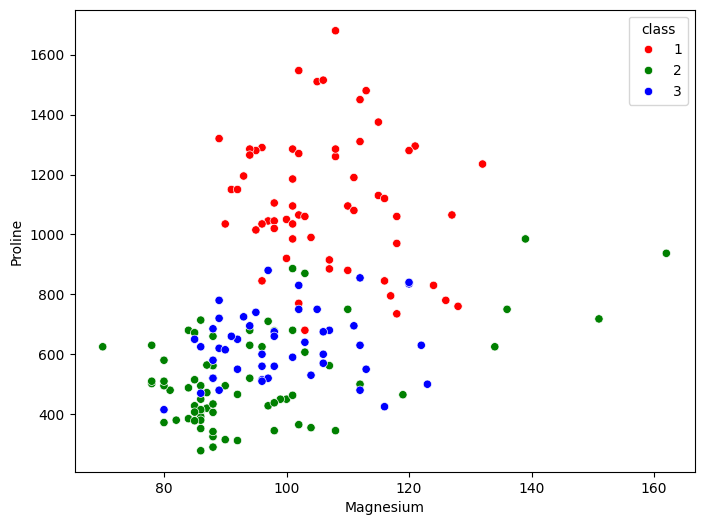

In [ ]:
plt.figure(figsize=(8,6)) #I plotted a graph for two features I choosed
sns.scatterplot(x=dataset['Magnesium'],y=dataset['Proline'],hue=dataset['class'],palette={1: 'red', 2: 'green', 3: 'blue'})

<Axes: xlabel='Flavanoids', ylabel='0D280_0D315_of_diluted_wines'>

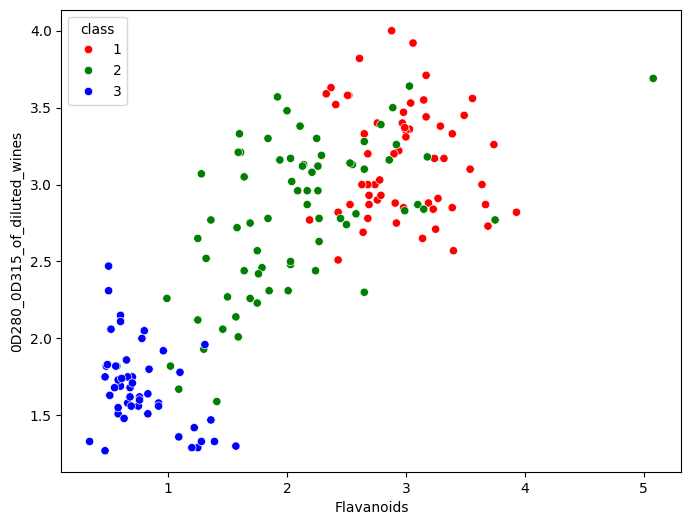

In [ ]:
plt.figure(figsize=(8,6)) #I plotted a graph for two features I choosed
sns.scatterplot(x=dataset['Flavanoids'],y=dataset['0D280_0D315_of_diluted_wines'],hue=dataset['class'],palette={1: 'red', 2: 'green', 3: 'blue'})

In [ ]:
X=dataset.drop('class',axis=1)  #Before I split and normalize the data I stored features and class different variables
Y=dataset['class']
print(X)
print(Y)

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

In [ ]:
scaler=MinMaxScaler(feature_range=(0,5))  #to make my KNN algorithm better I normalized my features between 0 and 5
X_normalized=scaler.fit_transform(X)
X=pd.DataFrame(X_normalized,columns=X.columns)
print(X)

      Alcohol  Malicacid       Ash  Alcalinity_of_ash  Magnesium  \
0    4.210526   0.958498  2.860963           1.288660   3.097826   
1    2.855263   1.027668  2.085561           0.154639   1.630435   
2    2.802632   1.600791  3.502674           2.061856   1.684783   
3    4.394737   1.195652  3.048128           1.597938   2.336957   
4    2.907895   1.828063  4.037433           2.680412   2.608696   
..        ...        ...       ...                ...        ...   
173  3.526316   4.851779  2.914439           2.551546   1.358696   
174  3.118421   3.132411  2.994652           3.195876   1.739130   
175  2.947368   3.498024  2.406417           2.422680   2.717391   
176  2.815789   1.828063  2.700535           2.422680   2.717391   
177  4.078947   3.320158  3.689840           3.582474   1.413043   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0         3.137931    2.869198              1.415094         2.965300   
1         2.879310    2.552743       

In [ ]:

X_train ,X_test,Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=0) #I splitted my data

KNN_Result= KNN(X_train,X_test,Y_train,Y_test,5) # To obtain confusion matrix adn classification report I took single result for K=5
confusionMatrix=confusion_matrix(Y_test,KNN_Result)
ClassificitonReport=classification_report(Y_test,KNN_Result)

print('Confusion Matrix')
print(confusionMatrix)

print('Classificiton Report')
print(ClassificitonReport)





Confusion Matrix
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
Classificiton Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



Accuracy for K=1: 0.9166666666666666
Accuracy for K=3: 0.9722222222222222
Accuracy for K=5: 0.9722222222222222
Accuracy for K=7: 0.9444444444444444
Accuracy for K=9: 0.9444444444444444
Accuracy for K=11: 0.9444444444444444
Accuracy for K=13: 0.9722222222222222
Accuracy for K=15: 0.9444444444444444
Accuracy for K=17: 0.9444444444444444
Accuracy for K=19: 0.9722222222222222
Accuracy for K=21: 0.9722222222222222
Accuracy for K=23: 0.9722222222222222
Accuracy for K=25: 0.9444444444444444
Accuracy for K=27: 0.9166666666666666
Accuracy for K=29: 0.9166666666666666


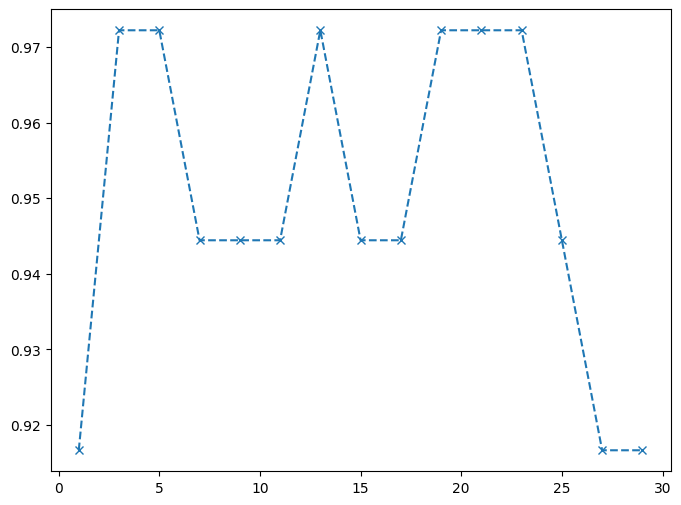

In [ ]:
results=[] 
for i in range(1,31,2): #to see the effect of K I used a loop and I plotted a graph below
    KNN_Result= KNN(X_train,X_test,Y_train,Y_test,i)
    results.append(accuracy_score(Y_test,KNN_Result))
    print(f"Accuracy for K={i}: {accuracy_score(Y_test,KNN_Result):}" )
    
plt.figure(figsize=(8,6))
plt.plot(range(1,31,2),results,marker='x',linestyle='dashed')
    